# Copulas 분포 모델링

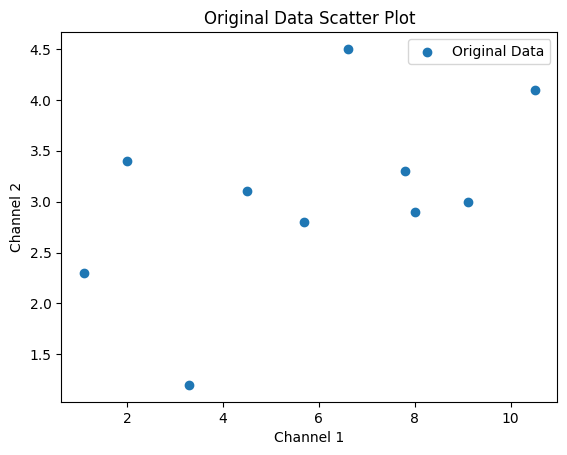

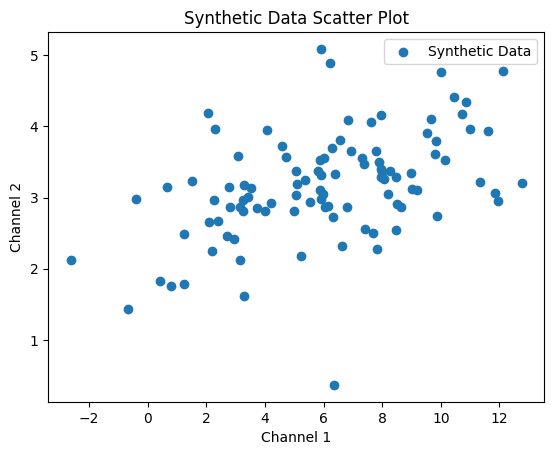

[[ 5.38269568  3.2523563 ]
 [ 1.22888739  2.48859952]
 [ 2.80228216  2.8660985 ]
 [ 5.00597598  2.80829972]
 [ 6.37081432  0.36800789]
 [ 6.23253271  4.89084477]
 [ 6.57640835  3.81511474]
 [ 6.94257111  3.6578194 ]
 [ 6.40359425  3.33742111]
 [ 3.14771333  2.11724391]
 [ 8.52061927  2.91559226]
 [ 7.94731762  3.29080287]
 [ 6.00241536  3.55112073]
 [ 2.71409501  2.46574371]
 [ 8.25728254  3.37525468]
 [ 7.31368417  3.55138717]
 [ 5.06331004  3.36749431]
 [10.98716444  3.95680446]
 [ 6.27715706  3.69138333]
 [ 5.05338093  3.03876579]
 [ 8.97717151  3.33955734]
 [ 3.27733058  1.61041674]
 [ 8.05419395  3.25798571]
 [ 5.53325121  2.93486821]
 [ 5.92341343  2.98530685]
 [ 8.47526191  2.54451215]
 [ 4.05549093  3.95443974]
 [ 7.3988768   2.55216102]
 [11.33210797  3.2202176 ]
 [ 7.83524368  2.27865973]
 [ 4.1972925   2.93019042]
 [ 7.90418239  3.49397668]
 [ 8.478859    3.29067766]
 [ 2.28050568  2.96367604]
 [ 0.78945615  1.76297762]
 [ 6.33057609  2.72087023]
 [ 6.80727692  2.87114368]
 

In [47]:
import numpy as np
from copulas.multivariate import GaussianMultivariate
import matplotlib.pyplot as plt
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore", category=RuntimeWarning)


# 예제 데이터 (2채널, 각 채널에 10개의 데이터)
data = np.array([
    [1.1, 2.3],
    [2.0, 3.4],
    [3.3, 1.2],
    [4.5, 3.1],
    [5.7, 2.8],
    [6.6, 4.5],
    [7.8, 3.3],
    [8.0, 2.9],
    [9.1, 3.0],
    [10.5, 4.1]
])

# Copula 모델 생성 및 학습
copula = GaussianMultivariate()
copula.fit(data)

# 학습된 모델 시각화 (Matplotlib 사용)
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.xlabel('Channel 1')
plt.ylabel('Channel 2')
plt.title('Original Data Scatter Plot')
plt.legend()
plt.show()

# Synthetic Data 생성
n_samples = 100  # 생성할 데이터의 개수
synthetic_data = copula.sample(n_samples)

# DataFrame을 numpy 배열로 변환
synthetic_data = synthetic_data.to_numpy()

# 생성된 Synthetic Data 시각화
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], label='Synthetic Data')
plt.xlabel('Channel 1')
plt.ylabel('Channel 2')
plt.title('Synthetic Data Scatter Plot')
plt.legend()
plt.show()

print(synthetic_data)


# 기동 시간차 예측

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# bore temp, 1st metal temp
data2022 = [(442.12457275, 519.33721924), (440.00610352, 520.55853271), (406.80517578, 498.57489014), (357.1774292,  487.58306885), 
            (421.66918945, 504.47790527), (402.98498535, 495.52160645), (367.8739624, 484.7333374), (452.23071289, 525.44378662), 
            (469.94250488, 532.16101074)]
data2024 = [(445.9654541,  514.69006348),(438.97689819, 526.47930908),(400.94171143, 502.76681519),(356.02090454, 484.26412964),
            (412.38296509, 517.98382568), (400.94171143, 502.76681519), (356.02090454, 484.26412964),(450.00521851, 531.5770874), 
            (470.01208496, 529.3994751)]
times = np.array([(24,27.25),(32,22.83),(27,24.25),(48,53.417),(32,27.5), (30,24.25), (29,53.41), (27, 24.67), (30,30.5)], dtype=np.float32)

inputs = np.array([(*a, *b) for a, b in zip(data2022,data2024)], dtype=np.float32)
inputs, times

(array([[442.12457, 519.3372 , 445.96545, 514.69006],
        [440.0061 , 520.55853, 438.9769 , 526.4793 ],
        [406.80518, 498.5749 , 400.9417 , 502.7668 ],
        [357.17743, 487.58307, 356.0209 , 484.26413],
        [421.6692 , 504.4779 , 412.38297, 517.9838 ],
        [402.985  , 495.5216 , 400.9417 , 502.7668 ],
        [367.87396, 484.73334, 356.0209 , 484.26413],
        [452.2307 , 525.4438 , 450.00522, 531.5771 ],
        [469.9425 , 532.161  , 470.0121 , 529.3995 ]], dtype=float32),
 array([[24.   , 27.25 ],
        [32.   , 22.83 ],
        [27.   , 24.25 ],
        [48.   , 53.417],
        [32.   , 27.5  ],
        [30.   , 24.25 ],
        [29.   , 53.41 ],
        [27.   , 24.67 ],
        [30.   , 30.5  ]], dtype=float32))

In [39]:
dtime = np.array([ a-b for a,b in times], dtype=np.float32)
dtime 

array([ -3.25 ,   9.17 ,   2.75 ,  -5.417,   4.5  ,   5.75 , -24.41 ,
         2.33 ,  -0.5  ], dtype=float32)

In [42]:
# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(inputs, dtime)

LinearRegression()

Predicted values: [  0.23845387   7.428151    -3.3576155   -7.2677717    4.72466
   7.8904314  -21.133007     5.7659197   -3.3648176 ]


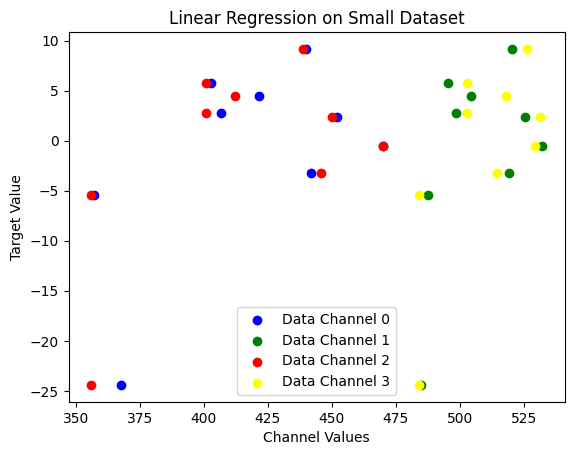

In [46]:
# 예측할 새로운 데이터
X_new = np.array([
    (442.12457, 519.3372 , 445.96545, 514.69006)
])

# 예측 수행
#y_pred = model.predict(X_new)
y_pred = model.predict(inputs)

print("Predicted values:", y_pred)

# 학습된 모델 시각화 (선택적)
plt.scatter(inputs[:, 0], dtime, color='blue', label='Data Channel 0')
plt.scatter(inputs[:, 1], dtime, color='green', label='Data Channel 1')
plt.scatter(inputs[:, 2], dtime, color='red', label='Data Channel 2')
plt.scatter(inputs[:, 3], dtime, color='yellow', label='Data Channel 3')

# plt.scatter(X_new[:, 0], y_pred, color='orange', label='Predictions Channel 0')
# plt.scatter(X_new[:, 1], y_pred, color='magenta', label='Predictions Channel 1')
plt.xlabel('Channel Values')
plt.ylabel('Target Value')
plt.title('Linear Regression on Small Dataset')
plt.legend()
plt.show()

In [ ]:
# 시간 편차: GT
# [ -3.25 ,      9.17 ,       2.75 ,      -5.417,       4.5  ,   5.75 ,   -24.41 ,        2.33 ,      -0.5 ]
# 시간 편차: 예측
# [0.23845387   7.428151    -3.3576155   -7.2677717    4.72466 7.8904314  -21.133007     5.7659197   -3.3648176 ] 